In [18]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [42]:
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [44]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [52]:
# Parameters.
inputDim = 1
outputDim = 1
learningRate = 0.01
epochs = 100

In [46]:
model = LinearRegression(inputDim, outputDim)

In [47]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [54]:
for epo in range(epochs):
    # Convert Inputs and Labels into Variables.
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Reset Gradients.
    optimizer.zero_grad()
    outputs = model(inputs)
    
    # Get loss for the predicted output.
    loss = criterion(outputs, labels)
    loss.backward()
    
    # Update Parameters.
    optimizer.step()
    print(f"epoch: {epo} loss: {loss.item()}")

epoch: 0 loss: 2.8077411684535036e-07
epoch: 1 loss: 2.772631546577031e-07
epoch: 2 loss: 2.7417692649578385e-07
epoch: 3 loss: 2.7118770162815053e-07
epoch: 4 loss: 2.681471187315765e-07
epoch: 5 loss: 2.6526714691499365e-07
epoch: 6 loss: 2.6242537387588527e-07
epoch: 7 loss: 2.5952604687518033e-07
epoch: 8 loss: 2.564119085946004e-07
epoch: 9 loss: 2.535594489927462e-07
epoch: 10 loss: 2.5082587740143936e-07
epoch: 11 loss: 2.4811748744468787e-07
epoch: 12 loss: 2.450993292768544e-07
epoch: 13 loss: 2.4245997565230937e-07
epoch: 14 loss: 2.3981436925168964e-07
epoch: 15 loss: 2.3698117956882925e-07
epoch: 16 loss: 2.3444657415438996e-07
epoch: 17 loss: 2.3184334452253097e-07
epoch: 18 loss: 2.2905301477749163e-07
epoch: 19 loss: 2.2663542154077732e-07
epoch: 20 loss: 2.2431451895954524e-07
epoch: 21 loss: 2.2146919320675806e-07
epoch: 22 loss: 2.190845407312736e-07
epoch: 23 loss: 2.1659606375123985e-07
epoch: 24 loss: 2.1429627850011457e-07
epoch: 25 loss: 2.120438153951909e-07
epo

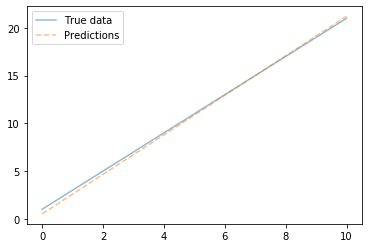

In [28]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.clf()
plt.plot(x_train, y_train, label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()